#### Project Name -

#### Tourism Experience Analytics: Classification, Prediction, and Recommendation System

#### Project Summary -

#### GitHub Link -

#### Problem Statement

Answer: Tourism agencies and travel platforms aim to enhance user experiences by leveraging data to provide personalized recommendations, predict user satisfaction, and classify potential user behavior. This project involves analyzing user preferences, travel patterns, and attraction features to achieve three primary objectives: regression, classification, and recommendation.

#### Let's Begin !

#### 1. Know Your Data

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

#### Dataset Loading

#### Dataset First View

In [2]:
path = "Tourism Dataset/*.csv"                  # Since there are multiple csv files are present
csv_files = glob.glob(path)
csv_files

['Tourism Dataset\\City.xlsx - Cities.csv',
 'Tourism Dataset\\Continent.xlsx - Continents.csv',
 'Tourism Dataset\\Country.xlsx - Countries.csv',
 'Tourism Dataset\\Item.xlsx - Item.csv',
 'Tourism Dataset\\Mode.xlsx - VisitingMode.csv',
 'Tourism Dataset\\Region.xlsx - Regions.csv',
 'Tourism Dataset\\Transaction.xlsx - Transaction.csv',
 'Tourism Dataset\\Type.xlsx - Types.csv',
 'Tourism Dataset\\Updated_Item.xlsx - Sheet1.csv',
 'Tourism Dataset\\User.xlsx - User.csv']

In [3]:
all_dfs = []

for one_filename in csv_files:
    new_df = pd.read_csv(one_filename)

    all_dfs.append(new_df)

one_filename

'Tourism Dataset\\User.xlsx - User.csv'

In [4]:
len(all_dfs)

10

In [5]:
all_dfs

[      CityId      CityName  CountryId
 0          0             -          0
 1          1        Douala          1
 2          2  South Region          1
 3          3     N'Djamena          2
 4          4        Kigali          3
 ...      ...           ...        ...
 9138    9138        Yeovil        163
 9139    9139          York        163
 9140    9140     Yorkshire        163
 9141    9141       Zaandam        163
 9142    9142         Sanaa        164
 
 [9143 rows x 3 columns],
    ContinentId            Continent
 0            0                    -
 1            1               Africa
 2            2              America
 3            3                 Asia
 4            4  Australia & Oceania
 5            5               Europe,
      CountryId         Country  RegionId
 0            0               -         0
 1            1        Cameroon         1
 2            2            Chad         1
 3            3          Rwanda         1
 4            4        Ethiopia   

In [57]:
data = pd.concat(all_dfs)                   # now combine the multiple csv files in one dataset
data

,CityId,CityName,CountryId,ContinentId,Continent,Country,RegionId,AttractionId,AttractionCityId,AttractionTypeId,...,AttractionAddress,VisitModeId,VisitMode,Region,TransactionId,UserId,VisitYear,VisitMonth,Rating,AttractionType
0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Douala,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,South Region,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,N'Djamena,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Kigali,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,7833.0,NaN,162.0,5.0,NaN,NaN,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88179.0,NaN,NaN,NaN,NaN
33526,2534.0,NaN,80.0,3.0,NaN,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88185.0,NaN,NaN,NaN,NaN
33527,2604.0,NaN,88.0,3.0,NaN,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88187.0,NaN,NaN,NaN,NaN
33528,6129.0,NaN,131.0,5.0,NaN,NaN,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88189.0,NaN,NaN,NaN,NaN


#### Dataset Rows & Columns count

In [58]:
rows, columns = data.shape
rows, columns

(97547, 21)

#### Dataset Information

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97547 entries, 0 to 33529
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CityId             42669 non-null  float64
 1   CityName           9142 non-null   object 
 2   CountryId          42838 non-null  float64
 3   ContinentId        33558 non-null  float64
 4   Continent          6 non-null      object 
 5   Country            165 non-null    object 
 6   RegionId           33717 non-null  float64
 7   AttractionId       54658 non-null  float64
 8   AttractionCityId   1728 non-null   float64
 9   AttractionTypeId   1745 non-null   object 
 10  Attraction         1728 non-null   object 
 11  AttractionAddress  1728 non-null   object 
 12  VisitModeId        6 non-null      float64
 13  VisitMode          52936 non-null  object 
 14  Region             22 non-null     object 
 15  TransactionId      52930 non-null  float64
 16  UserId             86460 no

#### Duplicate Values

In [60]:
duplicate_values = data.duplicated(subset = ['AttractionId','Country','Rating','AttractionType','VisitMode','Continent','TransactionId']).sum()
duplicate_values

np.int64(42725)

#### Missing Values/Null Values

In [61]:
data.isna()

,CityId,CityName,CountryId,ContinentId,Continent,Country,RegionId,AttractionId,AttractionCityId,AttractionTypeId,...,AttractionAddress,VisitModeId,VisitMode,Region,TransactionId,UserId,VisitYear,VisitMonth,Rating,AttractionType
0,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,False,True,False,False,True,True,False,True,True,True,...,True,True,True,True,True,False,True,True,True,True
33526,False,True,False,False,True,True,False,True,True,True,...,True,True,True,True,True,False,True,True,True,True
33527,False,True,False,False,True,True,False,True,True,True,...,True,True,True,True,True,False,True,True,True,True
33528,False,True,False,False,True,True,False,True,True,True,...,True,True,True,True,True,False,True,True,True,True


In [66]:
data.isna().sum().sort_values(ascending = False)

Continent            97541
VisitModeId          97541
AttractionType       97530
Region               97525
Country              97382
AttractionAddress    95819
AttractionCityId     95819
Attraction           95819
AttractionTypeId     95802
CityName             88405
ContinentId          63989
RegionId             63830
CityId               54878
CountryId            54709
VisitMonth           44617
VisitYear            44617
TransactionId        44617
Rating               44617
VisitMode            44611
AttractionId         42889
UserId               11087
dtype: int64

#### What did you know about your dataset?

#### 2. Understanding Your Variables

In [83]:
data.columns

Index(['CityId', 'CityName', 'CountryId', 'ContinentId', 'Continent',
       'Country', 'RegionId', 'AttractionId', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitModeId',
       'VisitMode', 'Region', 'TransactionId', 'UserId', 'VisitYear',
       'VisitMonth', 'Rating', 'AttractionType'],
      dtype='object')

In [64]:
data.describe()

,CityId,CountryId,ContinentId,RegionId,AttractionId,AttractionCityId,VisitModeId,TransactionId,UserId,VisitYear,VisitMonth,Rating
count,42669.000000,42838.000000,33558.000000,33717.000000,54658.000000,1728.000000,6.000000,52930.000000,86460.000000,52930.000000,52930.000000,52930.000000
mean,3658.105650,106.569261,3.600304,14.517039,801.722017,3193.203704,2.500000,70415.130474,45058.773780,2016.351899,6.633100,4.157699
std,2433.842394,37.103928,1.067609,4.167315,325.320342,2589.450657,1.870829,66299.514206,25007.866166,1.732926,3.392979,0.970543
min,0.000000,0.000000,0.000000,0.000000,369.000000,0.000000,0.000000,3.000000,14.000000,2013.000000,1.000000,1.000000
25%,1438.000000,93.000000,3.000000,13.000000,640.000000,259.500000,1.250000,19646.250000,23613.000000,2015.000000,4.000000,4.000000
50%,3354.000000,109.000000,4.000000,15.000000,737.000000,2563.500000,2.500000,42770.500000,45539.500000,2016.000000,7.000000,4.000000
75%,5267.000000,128.000000,4.000000,16.000000,841.000000,5910.000000,3.750000,105638.750000,66652.250000,2018.000000,9.000000,5.000000
max,9142.000000,164.000000,5.000000,21.000000,2965.000000,9142.000000,5.000000,211241.000000,88190.000000,2022.000000,12.000000,5.000000


#### Variables Description

#### Check Unique Values for each variable.

#### 3. Data Wrangling

#### Data Wrangling Code

#### What all manipulations have you done and insights you found?

#### 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

#### Missing Values Analysis

#### Heatmap Plot Represents for Missing Values

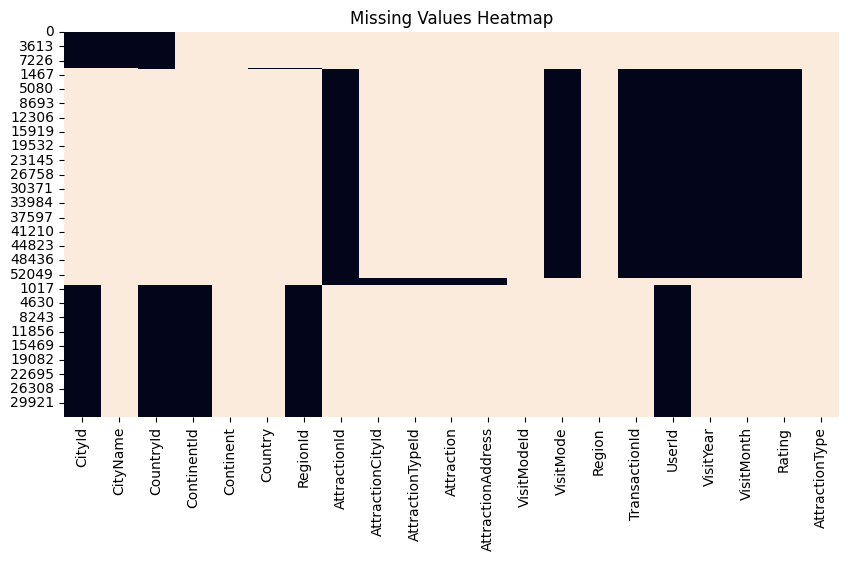

In [65]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isna(), cbar = False)
plt.title("Missing Values Heatmap")
plt.show()

#### Histogram Plot Represents Rating Distribution

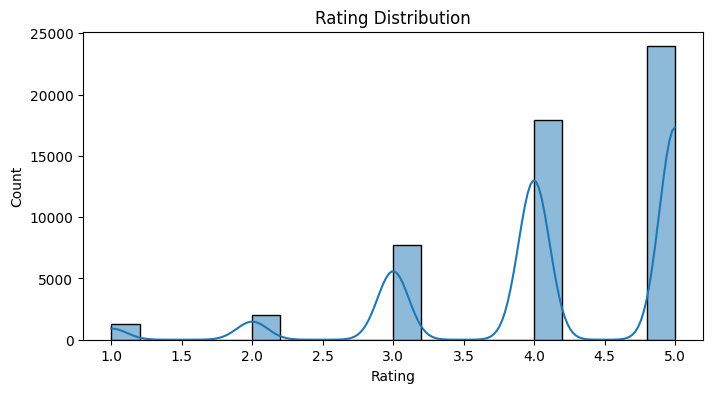

In [67]:
plt.figure(figsize=(8,4))
sns.histplot(data["Rating"], bins = 20, kde = True)
plt.title("Rating Distribution")
plt.show()

In [87]:
data_ = data.reset_index(drop = True)
data_

,CityId,CityName,CountryId,ContinentId,Continent,Country,RegionId,AttractionId,AttractionCityId,AttractionTypeId,...,AttractionAddress,VisitModeId,VisitMode,Region,TransactionId,UserId,VisitYear,VisitMonth,Rating,AttractionType
0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Douala,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,South Region,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,N'Djamena,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Kigali,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97542,7833.0,NaN,162.0,5.0,NaN,NaN,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88179.0,NaN,NaN,NaN,NaN
97543,2534.0,NaN,80.0,3.0,NaN,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88185.0,NaN,NaN,NaN,NaN
97544,2604.0,NaN,88.0,3.0,NaN,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88187.0,NaN,NaN,NaN,NaN
97545,6129.0,NaN,131.0,5.0,NaN,NaN,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88189.0,NaN,NaN,NaN,NaN


In [88]:
data_ = data.loc[:, ~data.columns.duplicated()]
data_

,CityId,CityName,CountryId,ContinentId,Continent,Country,RegionId,AttractionId,AttractionCityId,AttractionTypeId,...,AttractionAddress,VisitModeId,VisitMode,Region,TransactionId,UserId,VisitYear,VisitMonth,Rating,AttractionType
0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Douala,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,South Region,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,N'Djamena,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Kigali,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,7833.0,NaN,162.0,5.0,NaN,NaN,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88179.0,NaN,NaN,NaN,NaN
33526,2534.0,NaN,80.0,3.0,NaN,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88185.0,NaN,NaN,NaN,NaN
33527,2604.0,NaN,88.0,3.0,NaN,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88187.0,NaN,NaN,NaN,NaN
33528,6129.0,NaN,131.0,5.0,NaN,NaN,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88189.0,NaN,NaN,NaN,NaN


#### Count Plot Represents Variable Distribution

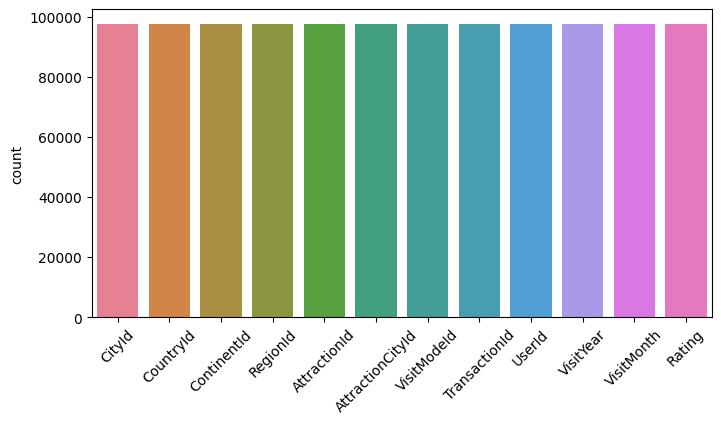

In [92]:
plt.figure(figsize = (8,4))
sns.countplot(data = data_)
plt.xticks(rotation=45)
plt.show()

#### Top Countries by Visits

In [93]:
top_countries = data["Country"].value_counts().head(10)
top_countries

Country
Cyprus        2
-             1
Chad          1
Cameroon      1
Ethiopia      1
Kenya         1
Mauritius     1
Seychelles    1
Sudan         1
Tanzania      1
Name: count, dtype: int64

#### Bar Plot Represents Top 10 Countries by visits

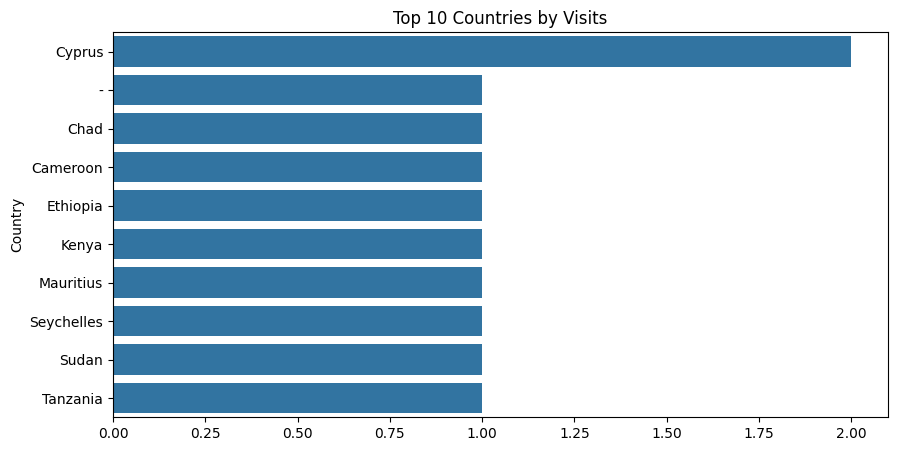

In [97]:
plt.figure(figsize=(10,5))
sns.barplot(x = top_countries.values, y = top_countries.index)
plt.title("Top 10 Countries by Visits")
plt.show()

#### Top 10 Cities by Visits

In [98]:
top_cities = data["CityName"].value_counts().head(10)
top_cities

CityName
-             8
Richmond      5
Victoria      4
Hamilton      4
Georgetown    4
Windsor       4
Cambridge     4
Albany        4
Kingston      4
Somerset      3
Name: count, dtype: int64

#### Bar Plot Represents Top 10 Cities by Visits 

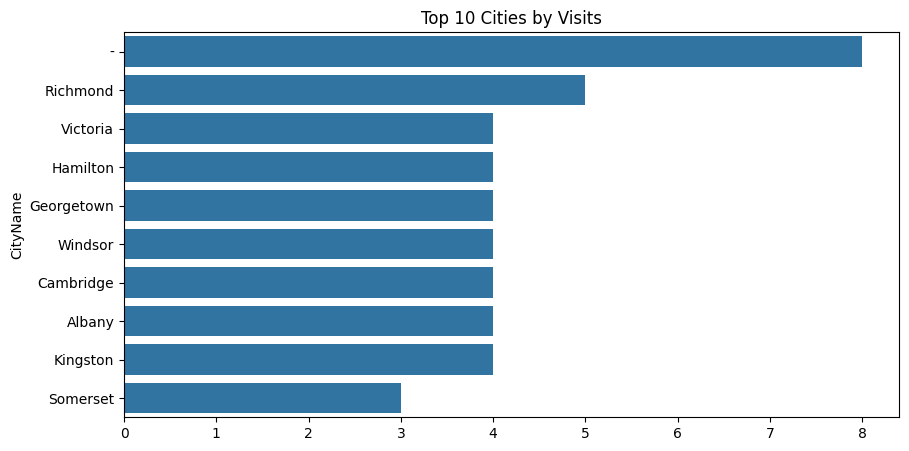

In [99]:
plt.figure(figsize = (10,5))
sns.barplot(x = top_cities.values, y = top_cities.index)
plt.title("Top 10 Cities by Visits")
plt.show()

#### Box Plot Represents Continent-wise Tourism Flow

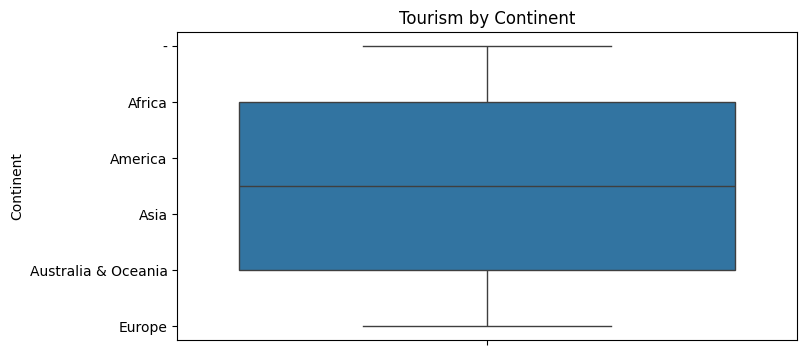

In [103]:
plt.figure(figsize =(8,4))
sns.boxplot(y = data["Continent"])
plt.xticks(rotation = 45)
plt.title("Tourism by Continent")
plt.show()

#### Bar Plot Represents Attraction Type Popularity by Rating

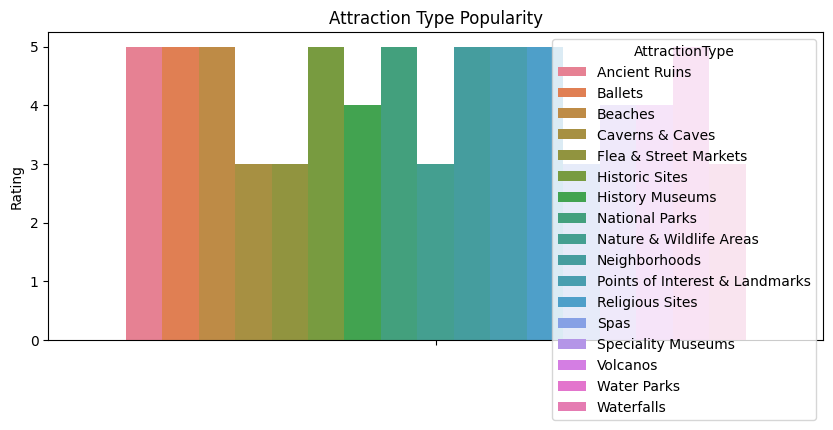

In [117]:
plt.figure(figsize=(10,4))
sns.barplot(data = data, y = "Rating", hue = 'AttractionType')
plt.title("Attraction Type Popularity")
plt.show()

#### User Activity Distribution

In [118]:
user_activity = data.groupby("UserId")["TransactionId"].count()
user_activity    

UserId
14.0        3
16.0       10
20.0        1
23.0        1
25.0        1
           ..
88179.0     1
88185.0     5
88187.0     1
88189.0     2
88190.0     1
Name: TransactionId, Length: 33530, dtype: int64

#### Kde Plot Represents User Activity Distribution

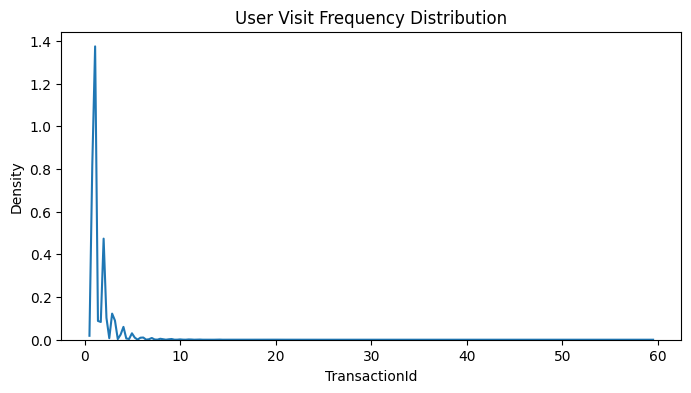

In [122]:
plt.figure(figsize = (8,4))
sns.kdeplot(data = user_activity)
plt.title("User Visit Frequency Distribution")
plt.show()

#### Top Active Users

In [123]:
top_users = user_activity.sort_values(ascending = False).head(10)
top_users

UserId
60799.0    59
84842.0    40
83466.0    33
53429.0    25
70663.0    25
22099.0    23
42223.0    22
25963.0    22
65568.0    22
44574.0    22
Name: TransactionId, dtype: int64

#### Bar Plot Represents Top 10 Active Users

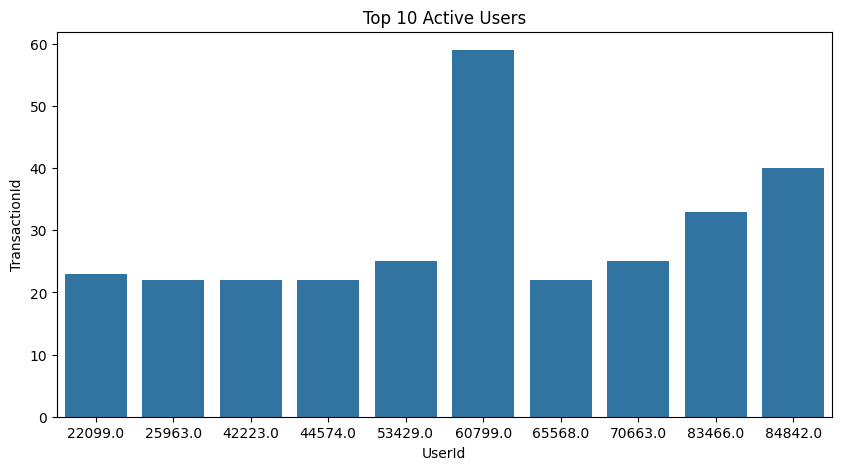

In [125]:
plt.figure(figsize=(10,5))
sns.barplot(data = top_users)
plt.title("Top 10 Active Users")
plt.show()

In [126]:
yearly = data.groupby("VisitYear")["TransactionId"].count()
yearly

VisitYear
2013.0     2983
2014.0     4808
2015.0     8687
2016.0    12823
2017.0     9444
2018.0     7461
2019.0     5913
2020.0      529
2021.0       35
2022.0      247
Name: TransactionId, dtype: int64

#### Line Plot Represents Year-wise Tourism Trends

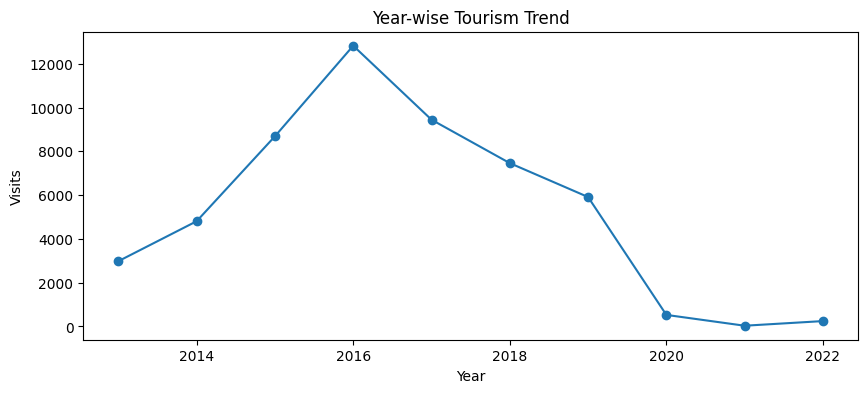

In [127]:
plt.figure(figsize = (10,4))
yearly.plot(kind = "line", marker="o")
plt.title("Year-wise Tourism Trend")
plt.xlabel("Year")
plt.ylabel("Visits")
plt.show()

#### Monthly Seasonality

In [128]:
monthly = data.groupby("VisitMonth")["TransactionId"].count()
monthly

VisitMonth
1.0     4458
2.0     3671
3.0     3772
4.0     4445
5.0     4316
6.0     4361
7.0     4861
8.0     5026
9.0     4917
10.0    4715
11.0    3846
12.0    4542
Name: TransactionId, dtype: int64

#### Line Plot Represents Monthly Seasonality Tourism Trends

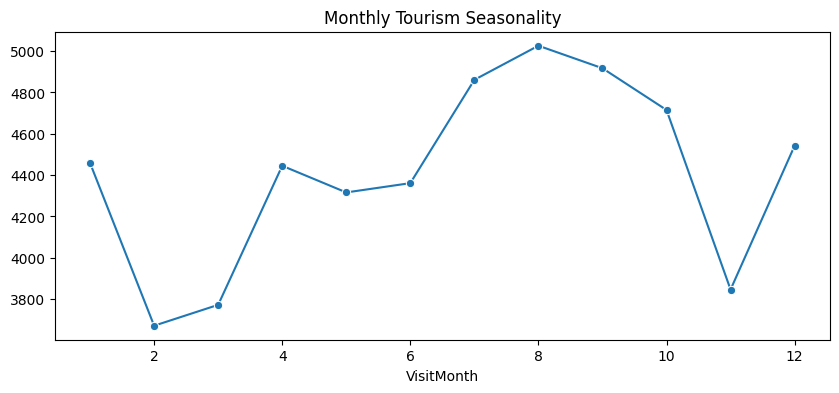

In [129]:
plt.figure(figsize = (10,4))
sns.lineplot(x = monthly.index, y = monthly.values, marker = "o")
plt.title("Monthly Tourism Seasonality")
plt.show()

#### Box Plot Represents VisitMode vs Rating

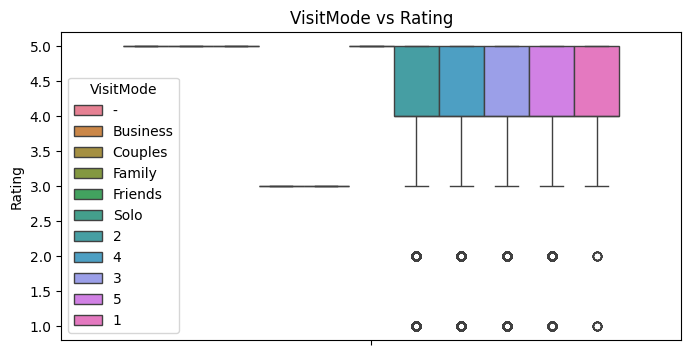

In [135]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, y = "Rating", hue = "VisitMode")
plt.xticks(rotation=45)
plt.title("VisitMode vs Rating")
plt.show()

#### Attraction Popularity

In [142]:
top_attractions = data["Attraction"].value_counts().head(10)
top_attractions

Attraction
Flea Market - Cavan                           3
History Museum - Sarvar                       3
Cultural Heritage Center - Goryachy Klyuch    3
Golden Sand Beach - Manama                    3
Paradise Beach - The Bight Settlement         3
Art Gallery - Chefchaouen                     3
Eco Park - Benoni                             3
History Museum - Colo-I-Suva                  3
Local Bazaar - Tripoli                        3
Kuta Beach - Bali                             2
Name: count, dtype: int64

#### Bar Plot Represents Top 10 Attractions Popularity

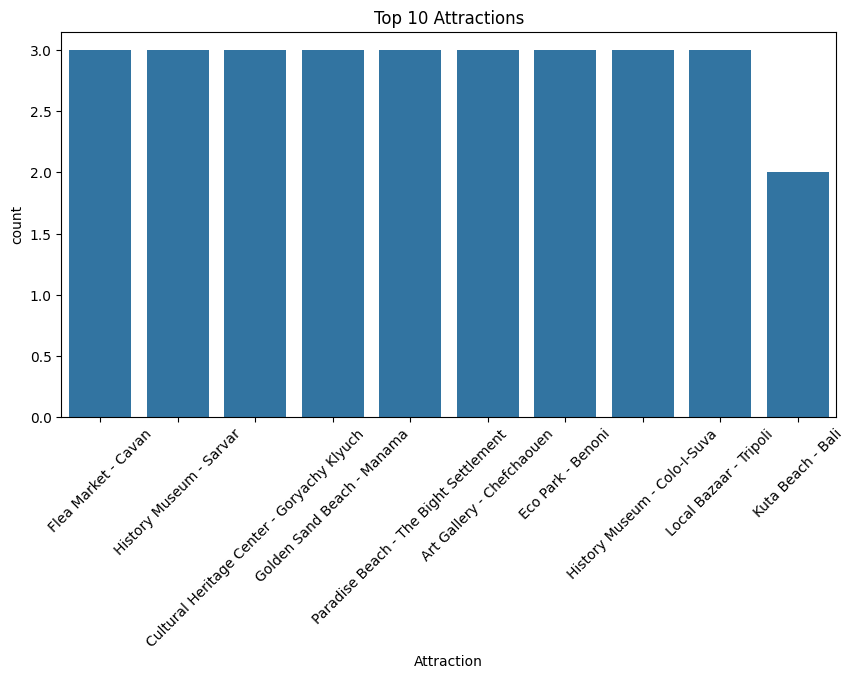

In [145]:
plt.figure(figsize=(10,5))
sns.barplot(data = top_attractions)
plt.xticks(rotation = 45)
plt.title("Top 10 Attractions")
plt.show()

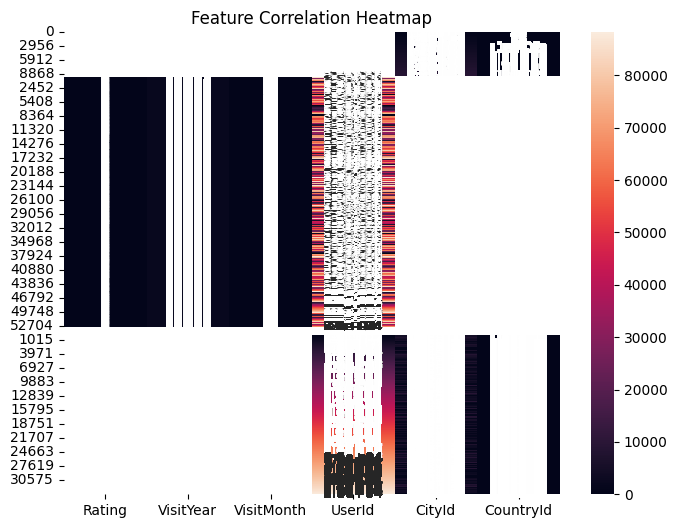

In [149]:
plt.figure(figsize = (8,6))
sns.heatmap(data[["Rating", "VisitYear", "VisitMonth", "UserId", "CityId", "CountryId"]], annot = True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
data["Rating"] = data["Rating"].fillna(data["Rating"].mean())
data["Rating"]

0        4.157699
1        4.157699
2        4.157699
3        4.157699
4        4.157699
           ...   
33525    4.157699
33526    4.157699
33527    4.157699
33528    4.157699
33529    4.157699
Name: Rating, Length: 97547, dtype: float64

# User-level Feature Engineering

#### Average rating per user

In [10]:
user_avg_rating = data.groupby("UserId")["Rating"].mean().reset_index()
user_avg_rating

,UserId,Rating
0,14.0,4.539425
1,16.0,4.650700
2,20.0,4.078849
3,23.0,4.578849
4,25.0,4.578849
...,...,...
33525,88179.0,3.078849
33526,88185.0,4.192950
33527,88187.0,4.578849
33528,88189.0,3.719233


In [12]:
user_avg_rating.columns = ["UserId", "UserAvgRating"]
user_avg_rating.columns

Index(['UserId', 'UserAvgRating'], dtype='object')

#### Frequency Visit per Transaction Id

In [13]:
user_visit_count = data.groupby("UserId")["TransactionId"].count().reset_index()       # Visit frequency
user_visit_count 

,UserId,TransactionId
0,14.0,3
1,16.0,10
2,20.0,1
3,23.0,1
4,25.0,1
...,...,...
33525,88179.0,1
33526,88185.0,5
33527,88187.0,1
33528,88189.0,2


In [14]:
user_visit_count.columns = ["UserId", "UserVisitCount"]
user_visit_count.columns

Index(['UserId', 'UserVisitCount'], dtype='object')

#### Avg rating per VisitMode

In [16]:
user_visitmode_profile = data.pivot_table(index = "UserId", columns = "VisitMode", values = "Rating", aggfunc = "mean").fillna(0).reset_index()
user_visitmode_profile

VisitMode,UserId,1,2,3,4,5
0,14.0,0.0,0.000000,0.0,4.666667,0.0
1,16.0,0.0,4.333333,5.0,4.500000,5.0
2,20.0,0.0,0.000000,4.0,0.000000,0.0
3,23.0,0.0,0.000000,0.0,5.000000,0.0
4,25.0,0.0,0.000000,0.0,5.000000,0.0
...,...,...,...,...,...,...
33525,88179.0,0.0,2.000000,0.0,0.000000,0.0
33526,88185.0,0.0,4.200000,0.0,0.000000,0.0
33527,88187.0,0.0,5.000000,0.0,0.000000,0.0
33528,88189.0,0.0,3.500000,0.0,0.000000,0.0


#### AttractionType preference

In [19]:
user_attraction_pref = (data.pivot_table(index = "UserId", columns = "AttractionType", values = "Rating", aggfunc = "mean").fillna(0).reset_index())
user_attraction_pref

AttractionType,UserId


# Normalization / Scaling

In [41]:
data['Rating'] = pd.to_numeric(data['Rating'], errors = 'coerce')
data['Rating']

0        16
1        16
2        16
3        16
4        16
         ..
33525    16
33526    16
33527    16
33528    16
33529    16
Name: Rating, Length: 97547, dtype: int64

In [42]:
data['Rating'].dtype

dtype('int64')

In [55]:
num_cols = ["VisitYear", "VisitMonth"]

# Recommendation Approaches

#### Collaborative Filtering

In [57]:
data = data[["UserId", "AttractionId", "Rating", "CityName", "Country", "Region", "Continent","AttractionType", "VisitYear", "VisitMonth"]]
data

,UserId,AttractionId,Rating,CityName,Country,Region,Continent,AttractionType,VisitYear,VisitMonth
0,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Douala,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,South Region,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,N'Djamena,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Kigali,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
33525,88179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33526,88185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33527,88187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33528,88189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.loc[:,"Rating"] = data["Rating"].fillna(data["Rating"].mean())    # Handle missing 'Rating' value, if missing
data.loc[:,"Rating"]

0        4.157699
1        4.157699
2        4.157699
3        4.157699
4        4.157699
           ...   
33525    4.157699
33526    4.157699
33527    4.157699
33528    4.157699
33529    4.157699
Name: Rating, Length: 97547, dtype: float64

In [64]:
user_item_matrix = data.pivot_table(index = "UserId", columns = "AttractionId", values = "Rating", aggfunc = "mean").fillna(0)    # User–Item matrix
user_item_matrix                                                  

AttractionId,369.0,481.0,640.0,650.0,673.0,737.0,748.0,749.0,824.0,841.0,...,1133.0,1137.0,1166.0,1171.0,1220.0,1225.0,1238.0,1278.0,1280.0,1297.0
UserId,,,,,,,,,,,,,,,,,,,,,
14.0,0.0,0.0,4.00,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16.0,0.0,5.0,4.25,0.0,0.0,0.0,5.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23.0,0.0,0.0,0.00,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88179.0,0.0,0.0,0.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88185.0,4.0,0.0,0.00,0.0,0.0,5.0,4.0,0.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88187.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
from sklearn.metrics.pairwise import cosine_similarity                 # User-based Collaborative Filtering

user_similarity = cosine_similarity(user_item_matrix)

user_similarity_data = pd.DataFrame(user_similarity, index = user_item_matrix.index, columns = user_item_matrix.index)
user_similarity_data

UserId,14.0,16.0,20.0,23.0,25.0,26.0,27.0,28.0,29.0,32.0,...,88168.0,88170.0,88175.0,88177.0,88178.0,88179.0,88185.0,88187.0,88189.0,88190.0
UserId,,,,,,,,,,,,,,,,,,,,,
14.0,1.000000,0.603672,0.000000,0.780869,0.0,0.780869,0.624695,0.0,0.624695,0.624695,...,0.624695,0.404029,0.624695,0.624695,0.624695,0.780869,0.327429,0.000000,0.499756,0.780869
16.0,0.603672,1.000000,0.460165,0.460165,0.0,0.460165,0.391141,0.0,0.391141,0.391141,...,0.391141,0.252975,0.391141,0.391141,0.391141,0.460165,0.578861,0.460165,0.312913,0.460165
20.0,0.000000,0.460165,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.314485,0.000000,0.000000,0.000000
23.0,0.780869,0.460165,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.419314,0.000000,0.000000,1.000000
25.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88179.0,0.780869,0.460165,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.419314,0.000000,0.000000,1.000000
88185.0,0.327429,0.578861,0.314485,0.419314,0.0,0.419314,0.000000,0.0,0.000000,0.000000,...,0.000000,0.169498,0.000000,0.000000,0.000000,0.419314,1.000000,0.524142,0.000000,0.419314
88187.0,0.000000,0.460165,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524142,1.000000,0.000000,0.000000


In [95]:
user_item_matrix.index[:10]


Index([14.0, 16.0, 20.0, 23.0, 25.0, 26.0, 27.0, 28.0, 29.0, 32.0], dtype='float64', name='UserId')

In [96]:
user_item_matrix.sum(axis=1).sort_values(ascending=False).head(10)


UserId
22099.0    43.666667
26271.0    40.166667
8964.0     40.000000
44015.0    39.600000
54831.0    37.666667
83466.0    36.454545
13754.0    35.900000
4034.0     34.250000
10572.0    34.000000
64240.0    33.500000
dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_9732\3835557669.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  similar_users = user_similarity_data[user_id].sort_values(ascending = False)[1:6]


KeyError: 1

In [107]:
user_sim_df[user_id]


NameError: name 'user_sim_df' is not defined

In [106]:
def recommend_user_based(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"UserId {user_id} not found. Use a valid UserId."

    similar_users = (
        user_sim_df.loc[user_id]
        .sort_values(ascending=False)[1:6]
    )

    weighted_scores = (
        user_item_matrix.loc[similar_users.index].T
        .dot(similar_users)
    )

    visited = user_item_matrix.loc[user_id] > 0
    recommendations = weighted_scores[~visited].sort_values(ascending=False)

    return recommendations.head(top_n)

recommend_user_based(user_id = 16.0, top_n=5)


NameError: name 'user_sim_df' is not defined

In [ ]:
valid_user_id = user_item_matrix.index[0]
recommend_user_based(valid_user_id)

In [85]:
item_similarity = cosine_similarity(user_item_matrix.T)                 # Item-based Collaborative Filtering 

item_similarity_data = pd.DataFrame(item_similarity, index = user_item_matrix.columns, columns = user_item_matrix.columns)
item_similarity_data

AttractionId,369.0,481.0,640.0,650.0,673.0,737.0,748.0,749.0,824.0,841.0,...,1133.0,1137.0,1166.0,1171.0,1220.0,1225.0,1238.0,1278.0,1280.0,1297.0
AttractionId,,,,,,,,,,,,,,,,,,,,,
369.0,1.000000,0.051794,0.071406,0.057954,0.067234,0.083907,0.072205,0.059994,0.068946,0.099016,...,0.002174,0.003963,0.019884,0.009694,0.006479,0.007095,0.004487,0.003151,0.005985,0.010206
481.0,0.051794,1.000000,0.068480,0.043912,0.055698,0.061706,0.063440,0.045319,0.059190,0.045633,...,0.000000,0.000000,0.010060,0.008393,0.002595,0.002009,0.007608,0.006184,0.001503,0.002949
640.0,0.071406,0.068480,1.000000,0.089273,0.089883,0.116497,0.274019,0.174610,0.104087,0.110575,...,0.004345,0.000603,0.010710,0.013564,0.010998,0.002891,0.007463,0.005185,0.004728,0.012281
650.0,0.057954,0.043912,0.089273,1.000000,0.061950,0.064780,0.076871,0.058921,0.057242,0.063292,...,0.000000,0.001558,0.014637,0.007822,0.005694,0.003247,0.007851,0.002972,0.001125,0.010003
673.0,0.067234,0.055698,0.089883,0.061950,1.000000,0.081870,0.079152,0.063872,0.063846,0.057557,...,0.004095,0.000000,0.008217,0.008625,0.002296,0.000000,0.008248,0.005113,0.005266,0.007234
737.0,0.083907,0.061706,0.116497,0.064780,0.081870,1.000000,0.116496,0.085622,0.207088,0.060539,...,0.005156,0.001865,0.015992,0.016521,0.010141,0.005569,0.006563,0.004476,0.006014,0.011200
748.0,0.072205,0.063440,0.274019,0.076871,0.079152,0.116496,1.000000,0.203754,0.107139,0.067371,...,0.000000,0.004303,0.014860,0.008634,0.004305,0.001744,0.011079,0.007261,0.005228,0.008586
749.0,0.059994,0.045319,0.174610,0.058921,0.063872,0.085622,0.203754,1.000000,0.070828,0.054642,...,0.002689,0.001206,0.010749,0.006600,0.001476,0.003562,0.004650,0.002514,0.001306,0.003212
824.0,0.068946,0.059190,0.104087,0.057242,0.063846,0.207088,0.107139,0.070828,1.000000,0.066626,...,0.002063,0.003239,0.015923,0.019539,0.005924,0.006751,0.009225,0.005908,0.008484,0.013098


In [99]:
def recommend_item_based(user_id, top_n = 5):
    user_ratings = user_item_matrix.loc[user_id]
    scores = item_similarity_data.dot(user_ratings)
    scores = scores.sort_values(ascending = False)
    
    visited = user_ratings[user_ratings > 0].index
    scores = scores.drop(visited)
    
    return scores.head(top_n)
    
recommend_item_based(user_id = 16.0, top_n = 5)

AttractionId
737.0    2.724256
749.0    2.614804
369.0    1.763275
673.0    1.663265
650.0    1.585999
dtype: float64

# Content-Based Filtering

In [114]:
text_cols = ["CityName", "Country", "Region", "Continent", "AttractionType"]

data_items.loc[:,text_cols] = data_items[text_cols].fillna("")
data_items.loc[:,text_cols]

,CityName,Country,Region,Continent,AttractionType
0,-,,,,
0,,,,,
1,,,,,
2,,,,,
3,,,,,
...,...,...,...,...,...
1693,,,,,
1694,,,,,
1695,,,,,
1696,,,,,


In [118]:
data_items.loc[:,text_cols] = data_items[text_cols].astype(str)
data_items.loc[:,text_cols]

,CityName,Country,Region,Continent,AttractionType
0,-,nan,nan,nan,nan
0,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,nan
...,...,...,...,...,...
1693,nan,nan,nan,nan,nan
1694,nan,nan,nan,nan,nan
1695,nan,nan,nan,nan,nan
1696,nan,nan,nan,nan,nan


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")
tfidf

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [125]:
data_items.loc[:,"content"] = (
    data_items["CityName"] + " " +
    data_items["Country"] + " " +
    data_items["Region"] + " " +
    data_items["Continent"] + " " +
    data_items["AttractionType"]
)


tfidf_matrix = tfidf.fit_transform(data_items.loc[:,"content"])
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1699 stored elements and shape (1699, 1)>

In [131]:
item_similarity_content = cosine_similarity(tfidf_matrix)

item_sim_content_data = pd.DataFrame(
    item_similarity_content,
    index=data_items["AttractionId"],
    columns=data_items["AttractionId"]
)


In [132]:
def recommend_content_based(attraction_id, top_n=5):
    similar_items = item_sim_content_data[attraction_id].sort_values(ascending=False)[1:]
    return similar_items.head(top_n)


In [133]:
def hybrid_recommendation(user_id, top_n=5, alpha=0.6):
    cf_scores = recommend_item_based(user_id, top_n=20)
    
    visited_items = user_item_matrix.loc[user_id]
    last_item = visited_items[visited_items > 0].index[-1]
    
    content_scores = item_sim_content_data[last_item]
    
    combined = alpha * cf_scores + (1 - alpha) * content_scores
    combined = combined.sort_values(ascending=False)
    
    return combined.head(top_n)

hybrid_recommendation(user_id = 16.0, top_n=5, alpha=0.6)


AttractionId
737.0    2.034553
749.0    1.968882
369.0    1.457965
673.0    1.397959
650.0    1.351599
dtype: float64

# Classification Task:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [19]:
drop_cols = ["VisitModeId", "CityName", "Country", "Continent","Region", "Attraction", "AttractionAddress"]    # Drop unwanted columns

data = data.drop(columns = drop_cols)
data

,CityId,CountryId,ContinentId,RegionId,AttractionId,AttractionCityId,AttractionTypeId,VisitMode,TransactionId,UserId,VisitYear,VisitMonth,Rating,AttractionType
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,7833.0,162.0,5.0,21.0,NaN,NaN,NaN,NaN,NaN,88179.0,NaN,NaN,NaN,NaN
33526,2534.0,80.0,3.0,12.0,NaN,NaN,NaN,NaN,NaN,88185.0,NaN,NaN,NaN,NaN
33527,2604.0,88.0,3.0,12.0,NaN,NaN,NaN,NaN,NaN,88187.0,NaN,NaN,NaN,NaN
33528,6129.0,131.0,5.0,17.0,NaN,NaN,NaN,NaN,NaN,88189.0,NaN,NaN,NaN,NaN


In [46]:
target = "VisitMode"             # create a target variable

X = data.drop(target, axis = 1)
y = data[target]

In [47]:
cat_cols = data.select_dtypes(include ='object').columns    # Identify categorical columns

for col in cat_cols:
    data[col] = data[col].astype(str)

data[col]

0        17
1        17
2        17
3        17
4        17
         ..
33525    17
33526    17
33527    17
33528    17
33529    17
Name: AttractionType, Length: 97541, dtype: int64

In [52]:
num_cols = data.select_dtypes(include = ['int64', 'float64']).columns          # Numeric NaNs → median

data.loc[:,num_cols] = data[num_cols].fillna(data[num_cols].median())
data.loc[:,num_cols]

,CityId,CountryId,ContinentId,RegionId,AttractionId,AttractionCityId,AttractionTypeId,VisitMode,TransactionId,UserId,VisitYear,VisitMonth,Rating,AttractionType
0,0.0,0.0,4.0,15.0,737.0,2563.5,22,5,42770.5,45539.5,2016.0,7.0,4.0,17
1,1.0,1.0,4.0,15.0,737.0,2563.5,22,5,42770.5,45539.5,2016.0,7.0,4.0,17
2,2.0,1.0,4.0,15.0,737.0,2563.5,22,5,42770.5,45539.5,2016.0,7.0,4.0,17
3,3.0,2.0,4.0,15.0,737.0,2563.5,22,5,42770.5,45539.5,2016.0,7.0,4.0,17
4,4.0,3.0,4.0,15.0,737.0,2563.5,22,5,42770.5,45539.5,2016.0,7.0,4.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,7833.0,162.0,5.0,21.0,737.0,2563.5,22,5,42770.5,88179.0,2016.0,7.0,4.0,17
33526,2534.0,80.0,3.0,12.0,737.0,2563.5,22,5,42770.5,88185.0,2016.0,7.0,4.0,17
33527,2604.0,88.0,3.0,12.0,737.0,2563.5,22,5,42770.5,88187.0,2016.0,7.0,4.0,17
33528,6129.0,131.0,5.0,17.0,737.0,2563.5,22,5,42770.5,88189.0,2016.0,7.0,4.0,17


In [22]:
cat_cols = data.select_dtypes(include = 'object').columns          # Categorical NaNs → 'Unknown'

data[cat_cols] = data[cat_cols].fillna(' ')
data[cat_cols]

,AttractionTypeId,VisitMode,AttractionType
0,nan,nan,nan
1,nan,nan,nan
2,nan,nan,nan
3,nan,nan,nan
4,nan,nan,nan
...,...,...,...
33525,nan,nan,nan
33526,nan,nan,nan
33527,nan,nan,nan
33528,nan,nan,nan


In [42]:
for col in data.columns:                                     # This will show exactly which columns have mixed int + str.
    types = data[col].map(type).nunique()
    if types > 1:
        print(col, data[col].map(type).unique())

In [53]:
le_dict = {}                                             # Label Encoding (simple & effective for tree models)

for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le

In [49]:
class_counts = data[target].value_counts()                            # Remove Rare Classes that are leaa than 2 
                                                                      # to prevent the error minimum number of groups for any class cannot be less than 2
valid_classes = class_counts[class_counts >= 2].index

data = data[data[target].isin(valid_classes)]
data

,CityId,CountryId,ContinentId,RegionId,AttractionId,AttractionCityId,AttractionTypeId,VisitMode,TransactionId,UserId,VisitYear,VisitMonth,Rating,AttractionType
0,0.0,0.0,4.0,15.0,737.0,2563.5,22,5,42770.5,45539.5,2016.0,7.0,4.0,17
1,1.0,1.0,4.0,15.0,737.0,2563.5,22,5,42770.5,45539.5,2016.0,7.0,4.0,17
2,2.0,1.0,4.0,15.0,737.0,2563.5,22,5,42770.5,45539.5,2016.0,7.0,4.0,17
3,3.0,2.0,4.0,15.0,737.0,2563.5,22,5,42770.5,45539.5,2016.0,7.0,4.0,17
4,4.0,3.0,4.0,15.0,737.0,2563.5,22,5,42770.5,45539.5,2016.0,7.0,4.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,7833.0,162.0,5.0,21.0,737.0,2563.5,22,5,42770.5,88179.0,2016.0,7.0,4.0,17
33526,2534.0,80.0,3.0,12.0,737.0,2563.5,22,5,42770.5,88185.0,2016.0,7.0,4.0,17
33527,2604.0,88.0,3.0,12.0,737.0,2563.5,22,5,42770.5,88187.0,2016.0,7.0,4.0,17
33528,6129.0,131.0,5.0,17.0,737.0,2563.5,22,5,42770.5,88189.0,2016.0,7.0,4.0,17


In [50]:
X = data.drop(target, axis = 1)
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)   # Splitting Data
X_train, X_test, y_train, y_test

(       CityId  CountryId  ContinentId  RegionId  AttractionId  \
 6373   6373.0      139.0          4.0      15.0         737.0   
 9544    426.0      163.0          5.0      21.0         737.0   
 10471  3407.0      103.0          3.0      14.0         737.0   
 29869  3211.0      101.0          3.0      14.0         737.0   
 19357  5267.0      109.0          4.0      15.0         737.0   
 ...       ...        ...          ...       ...           ...   
 26117  3354.0      103.0          3.0      14.0         737.0   
 48821  3354.0      109.0          4.0      15.0        1171.0   
 10407  6629.0      144.0          5.0      19.0         737.0   
 18643  3417.0      103.0          3.0      14.0         737.0   
 6577   6577.0      144.0          4.0      15.0         737.0   
 
        AttractionCityId  AttractionTypeId  TransactionId   UserId  VisitYear  \
 6373             2563.5                22        42770.5  45539.5     2016.0   
 9544             2563.5                22  

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier                            # Random Forest Classifier

rf = RandomForestClassifier(n_estimators = 200, max_depth = 15, random_state = 42, n_jobs = -1)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7214618893843867
              precision    recall  f1-score   support

           1       1.00      0.02      0.05       125
           2       0.47      0.85      0.61      4324
           3       0.55      0.34      0.42      3043
           4       0.44      0.18      0.25      2189
           5       0.68      0.04      0.08       905
          11       1.00      1.00      1.00      8923

    accuracy                           0.72     19509
   macro avg       0.69      0.41      0.40     19509
weighted avg       0.74      0.72      0.69     19509



# LightGBM

In [33]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    objective = "multiclass",
    num_class = len(np.unique(y)), n_estimators = 300, learning_rate = 0.05, max_depth = -1, random_state = 42)

lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1493
[LightGBM] [Info] Number of data points in the train set: 78032, number of used features: 12
[LightGBM] [Info] Start training from score -5.054274
[LightGBM] [Info] Start training from score -1.506644
[LightGBM] [Info] Start training from score -1.857816
[LightGBM] [Info] Start training from score -2.187380
[LightGBM] [Info] Start training from score -3.070645
[LightGBM] [Info] Start training from score -0.782305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.7219232149264442
              precision    recall  f1-score   support

           1       0.61      0.09      0.15       125
           2       0.48      0.84      0.61      4324
           3       0.54      0.37      0.44      3043
  

# XGBoost

In [51]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)), n_estimators = 300, learning_rate = 0.05, max_depth = 8, subsample = 0.8, colsample_bytree = 0.8, eval_metric = "mlogloss", random_state = 42)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.722999641191245
              precision    recall  f1-score   support

           0       0.80      0.06      0.12       125
           1       0.48      0.83      0.61      4324
           2       0.53      0.38      0.44      3043
           3       0.46      0.17      0.25      2189
           4       0.61      0.05      0.09       905
           5       1.00      1.00      1.00      8923

    accuracy                           0.72     19509
   macro avg       0.65      0.42      0.42     19509
weighted avg       0.73      0.72      0.69     19509



#### Feature importance plot

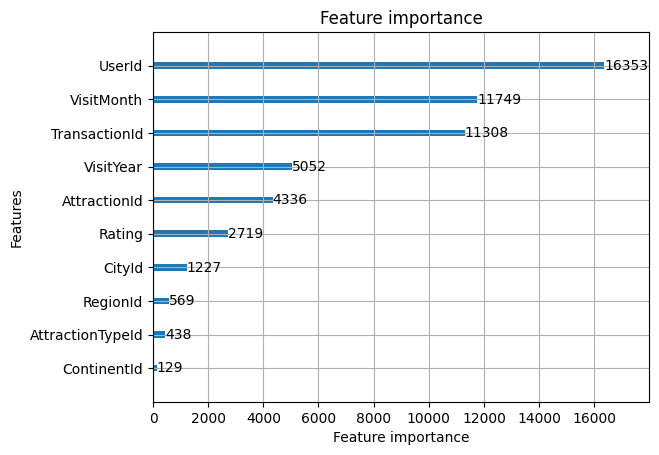

In [54]:
lgb.plot_importance(lgb_model, max_num_features=10)
plt.show()


Answer: This plot helps what influences VisitMode most also Location vs User behavior vs Rating.

Conclusion:  Trained a classifier (e.g., Random Forest, LightGBM, or XGBoost) to predict VisitMode based on user and transaction features.